<a href="https://colab.research.google.com/github/Samiyah-sa/Project546/blob/master/threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
from skimage.color import rgb2gray
from scipy import ndimage as ndi
import cv2
%matplotlib inline

# ...........
from skimage.metrics import (adapted_rand_error,variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour, inverse_gaussian_gradient,
                                  watershed, mark_boundaries)

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


(300, 300, 3)


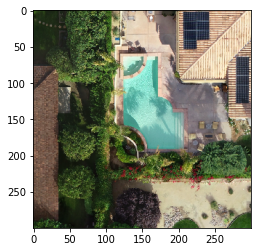

In [0]:
# 
path0 = '/content/gdrive/My Drive/project543'
path = path0+'image-chips'
# read the image 
image = plt.imread('/content/gdrive/My Drive/project543/image-chips/1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
# print the size of the image 
print(image.shape)
# show the image
plt.imshow(image)

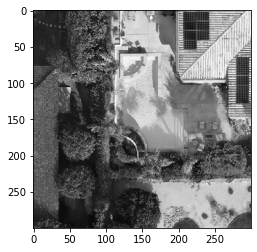

In [0]:
#convert the image to gray level 
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [0]:
gray.shape

(300, 300)

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]


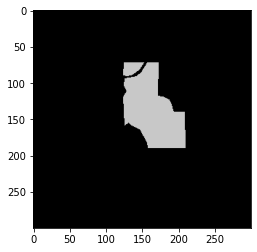

In [0]:
path = path0+'label-chips/'
GT = plt.imread('/content/gdrive/My Drive/project543/label-chips/1d4fbe33f3_F1BE1D4184INSPIRE-000000.png')
GT.shape
image_grount_truth = GT[:,:,0]
GT = np.round(GT*1000)/4
GT = GT.astype('int')
print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
# (075, 025, 230) : BUILDING
# (180, 030, 145) : CLUTTER
# (075, 180, 060) : VEGETATION
# (048, 130, 245) : WATER
# (255, 255, 255) : GROUND
# (200, 130, 000) : CAR
# (255, 000, 255) : IGNORE

plt.imshow((GT==3)*200)

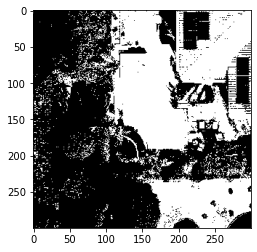

In [0]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray_bw = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray_bw, cmap='gray')

[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[0 1 2 3 4]
[[1 2 0 ... 4 0 0]
 [3 2 2 ... 4 0 0]
 [1 2 0 ... 4 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


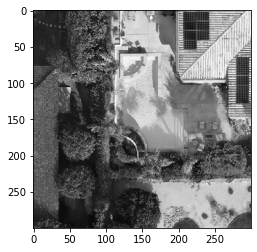

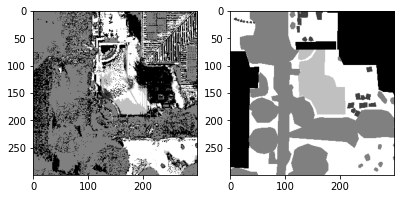

In [0]:
gray_original = rgb2gray(image)
plt.imshow(gray_original, cmap='gray')
gray_r = gray_original.copy()
gray_r = gray_original.reshape(gray_original.shape[0]*gray_original.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] >  220/255:
        gray_r[i] = 0 #BUILDING 
    elif gray_r[i] > 170/255:
        gray_r[i] = 4  #GROUND
    elif gray_r[i] > 140/255:  # 140 to 170
        gray_r[i] = 3  # WATER
    elif gray_r[i] > 130/255:
        gray_r[i] = 1  # CLUTTER
    elif gray_r[i] > 90/255:
        gray_r[i] = 0 #BUILDING
    elif gray_r[i] > 20/255:
        gray_r[i] = 2  #VEGETATION
    else:
        gray_r[i] = 0
gray_resut = gray_r.reshape(gray.shape[0],gray.shape[1])
gray_resut = gray_resut.astype('int')

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(gray_resut*40 , cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(GT[:,:,2]*40  , cmap='gray')
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

print(GT[:,:,2])
unique_elements = np.unique(GT)
print(unique_elements)
print(gray_resut)

In [0]:
# compute metrics
Grount_truth_matrix = GT[:,:,0]
print(Grount_truth_matrix.shape)
print(gray.shape)
print(Grount_truth_matrix)
print(gray_resut)


error, precision, recall = adapted_rand_error(Grount_truth_matrix, gray_resut)
print("Error: " , error)
print("precision: " , precision*100)
print("recall: " , recall*100)
splits, merges = variation_of_information(Grount_truth_matrix, gray_resut)


(300, 300)
(300, 300)
[[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]]
[[1 2 0 ... 4 0 0]
 [3 2 2 ... 4 0 0]
 [1 2 0 ... 4 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
Error:  0.5378165825001274
precision:  40.911946348600864
recall:  53.10639121411228
